# Video Game Sales 电子游戏销售分析
仓库地址为：https://github.com/Wchoward/DataMiningClass/tree/master/assignment3

## 目录
- [1 数据概要与预处理](#1)
- [2 市场分析](#2)
- [3 频繁模式计算](#3)
- [4 关联规则导出与评价](#4)
- [5 挖掘结果分析与可视化](#5)
    - [挖掘结果分析](#5.1)
    - [关联规则可视化](#5.2)
- [附录 其它年份的挖掘结果](#6)
    - [2012](#2012)
    - [2013](#2013)
    - [2014](#2014)
    - [2015](#2015)
    - [2016](#2016)

In [37]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

In [2]:
def load_data(path,filename):
    return pd.read_csv(path + '/' + filename)

确定数据集根目录：

In [3]:
root = 'data/'

In [4]:
df = load_data(root, 'vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [5]:
np.unique(df['Platform'])

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

## 数据预处理：

查看数据是否存在缺失值：

In [6]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

由上可知Year 与 Publisher存在缺失值，删除缺失值：

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

由于数据都是在2016年及之前的游戏，2017年之后的数据非常少，删除2017年之后的数据

In [9]:
df = df[df.Year < 2017]
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## 电子游戏市场分析

下面将对受欢迎的游戏、类型、发布平台、发行人进行分析：

__受欢迎游戏的发行年份__：

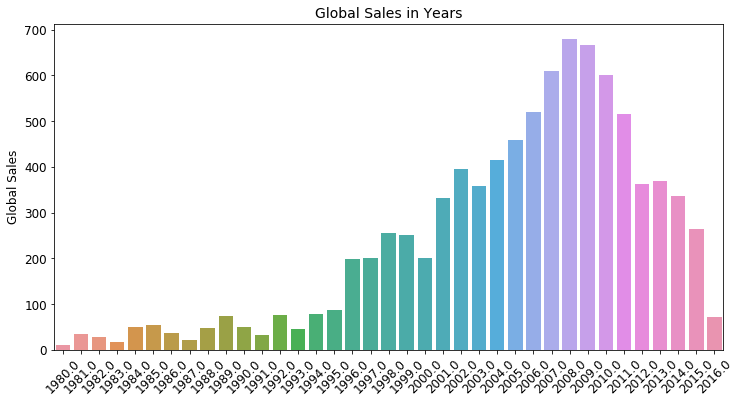

In [10]:
global_sales_df = df.groupby(['Year'])['Global_Sales'].sum()

plt.figure(figsize=(12, 6))

sns.barplot(x=global_sales_df.index, y=global_sales_df.values)

plt.ylabel('Global Sales', fontsize=12)
plt.xlabel('')
plt.title('Global Sales in Years', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

由上图可知，在2007-2010年期间发行的游戏较受欢迎，而2011年以后销量下降，由于该数据集采集的是从发行至今整体的销量（而不是按每年销量存储的数据），因此认为应该是游戏相对较新，面世时间较短，还没有许多人购买（可能后续会购买）。

__受欢迎的游戏类型__：

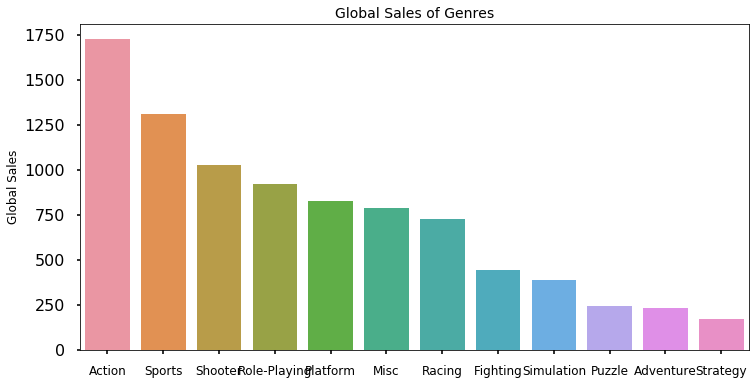

In [11]:
style.use('seaborn-poster')
genre_global_sales = df.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_global_sales.index, y=genre_global_sales.values)
plt.xticks(fontsize=12)
plt.xlabel('')
plt.ylabel('Global Sales', fontsize=12)
plt.title('Global Sales of Genres', fontsize=14)
plt.show()

右上图可知，1980-2016年间，最受欢迎的游戏类型分别为 动作类（Action）、运动类（Sports)、设计类（Shooter），而最不受欢迎的游戏类型为策略类（Strategy）、冒险类（Adventure）、解谜类（Puzzle）。

__受欢迎的发布平台__：

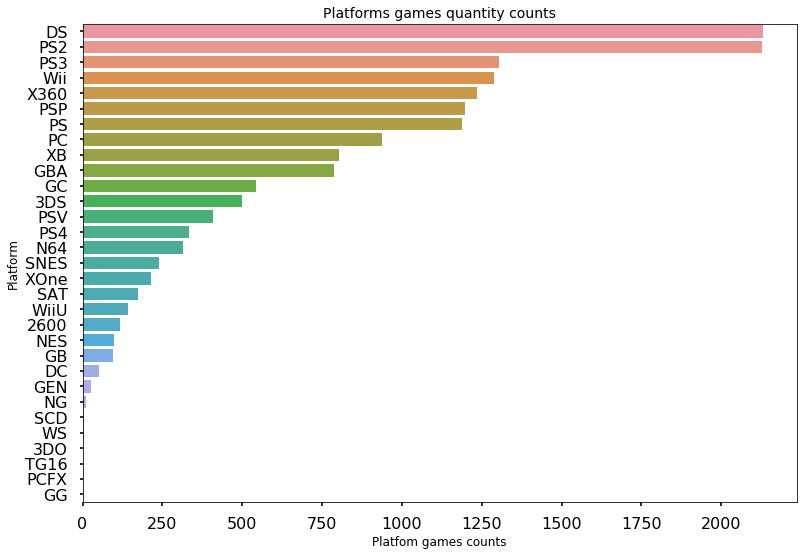

In [34]:
platform_counts = df['Platform'].value_counts().sort_values(ascending=False)
sns.barplot(y=platform_counts.index, x=platform_counts.values)
plt.xlabel('Platfom games counts', fontsize=12)
plt.ylabel('Platform', fontsize=12)
plt.title('Platforms games quantity counts', fontsize=14)
plt.show()

由上图可知，DS以及PS2平台拥有的游戏数量最高

__受欢迎的发行商__：

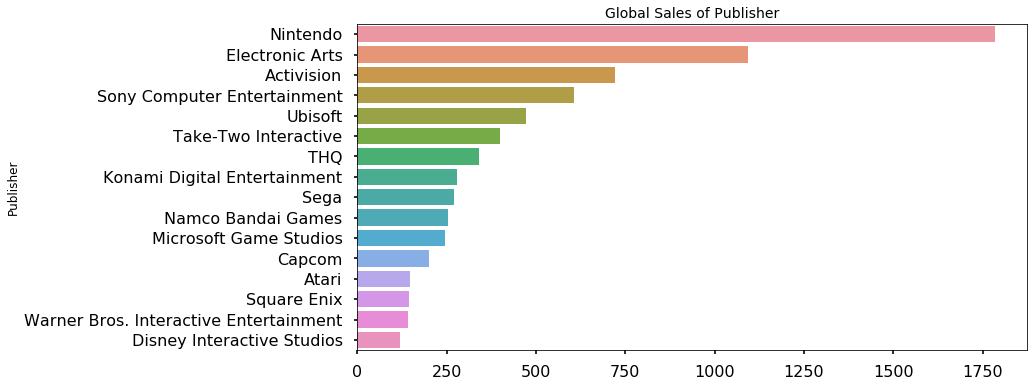

In [43]:
publisher_global_sales = df.groupby(['Publisher'])['Global_Sales'].sum().sort_values(ascending=False)
publisher_global_sales = publisher_global_sales[publisher_global_sales.values > 100]
plt.figure(figsize=(12, 6))
sns.barplot(y=publisher_global_sales.index, x = publisher_global_sales.values)
plt.xlabel('')
plt.ylabel('Publisher', fontsize=12)
plt.title('Global Sales of Publisher', fontsize=14)
plt.show()

由上图可知，Nintendo发行的游戏最受玩家欢迎

## 电子游戏销售额预测